# Avaliação SUBSTITUTIVA de Ciência dos dados

___
# Nome: Ester dos Santos Quintino

___
### Leia atentamente as instruções da AS descritas na parte em papel e que devem ser seguidas rigorosamente aqui!

___


In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [37]:
dados = pd.read_excel("houseAS.xlsx")

In [38]:
dados.head()

,SalePrice,Foundation,OverallQual,LotArea,X1stFlrSF,X2ndFlrSF,GarageCars,Fireplaces,Street,LandSlope,RoofStyle,CentralAir,YearBuilt,YrSold
0,208500,PConc,Good,8450,856,854,2,0,Pave,Gtl,Gable,Y,2003,2008
1,181500,CBlock,Above Average,9600,1262,0,2,1,Pave,Gtl,Gable,Y,1976,2007
2,223500,PConc,Good,11250,920,866,2,1,Pave,Gtl,Gable,Y,2001,2008
3,140000,BrkTil,Good,9550,961,756,3,1,Pave,Gtl,Gable,Y,1915,2006
4,250000,PConc,Very Good,14260,1145,1053,3,1,Pave,Gtl,Gable,Y,2000,2008


In [39]:
dados.columns

Index(['SalePrice', 'Foundation', 'OverallQual', 'LotArea', 'X1stFlrSF',
       'X2ndFlrSF', 'GarageCars', 'Fireplaces', 'Street', 'LandSlope',
       'RoofStyle', 'CentralAir', 'YearBuilt', 'YrSold'],
      dtype='object')

In [40]:
dados.Foundation = dados.Foundation.astype('category')
dados.OverallQual = dados.OverallQual.astype('category')
dados.Street = dados.Street.astype('category')
dados.LandSlope = dados.LandSlope.astype('category')
dados.RoofStyle = dados.RoofStyle.astype('category')
dados.CentralAir = dados.CentralAir.astype('category')

dados.Foundation.cat.categories = (['BrkTil','CBlock','PConc','Slab','Stone','Wood'])
dados.OverallQual.cat.categories = (['Very Poor','Poor','Fair','Below Average','Average',
                                     'Above Average','Good','Very Good','Excellent','Very Excellent'])

dados.Street.cat.categories = (['Grvl','Pave'])
dados.LandSlope.cat.categories = (['Gtl','Mod','Sev'])
dados.RoofStyle.cat.categories = (['Flat','Gable','Gambrel','Hip','Mansard','Shed'])
dados.CentralAir.cat.categories = (['N','Y'])

___
## Q1)

#### Assuma que o objetivo para trabalhar com a base de dados acima seja: “Analisar como uma determinada variável pode influenciar a variação do preço de vendas de um imóvel”.

(1,50 ponto) Utilizando alguma ferramenta estatística (**gráfica**) que seja adequada, analise como a quantidade de carros na garagem (variável `GarageCars`) pode influencia a variação do preço de vendas de um imóvel (variável `SalePrice`). A interpretação precisa ser completa PORÉM sucinta.


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model

In [9]:

#separando aleatoriamente a base de dados, para teste e treino, contendo 25% e 75%, respectivamente.#separan 
train, test = train_test_split(dados, test_size=0.25)
test.reset_index()
train.reset_index()

,index,SalePrice,Foundation,OverallQual,LotArea,X1stFlrSF,X2ndFlrSF,GarageCars,Fireplaces,Street,LandSlope,RoofStyle,CentralAir,YearBuilt,YrSold
0,632,82500,CBlock,Above Average,11900,1411,0,2,1,Pave,Gtl,Hip,Y,1977,2009
1,944,137500,CBlock,Very Poor,14375,1344,0,2,1,Pave,Gtl,Gable,Y,1958,2009
2,698,138500,CBlock,Poor,8450,894,0,1,1,Pave,Gtl,Gable,Y,1965,2010
3,634,144000,CBlock,Very Poor,6979,1056,0,2,0,Pave,Gtl,Gable,Y,1980,2010
4,271,241500,CBlock,Above Average,39104,1363,0,2,2,Pave,Sev,Flat,Y,1954,2008
5,1,181500,CBlock,Very Poor,9600,1262,0,2,1,Pave,Gtl,Gable,Y,1976,2007
6,553,108000,CBlock,Fair,8777,1126,0,2,0,Pave,Gtl,Gable,Y,1949,2009
7,457,256000,CBlock,Fair,53227,1663,0,2,2,Pave,Mod,Flat,Y,1954,2008
8,521,150000,CBlock,Very Poor,11988,1244,0,1,2,Pave,Gtl,Gable,Y,1957,2007
9,1308,147000,CBlock,Poor,12000,1122,0,2,0,Pave,Gtl,Gable,Y,1948,2008


In [11]:
X = train[[ "GarageCars"]]

y = train['SalePrice']

In [15]:
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

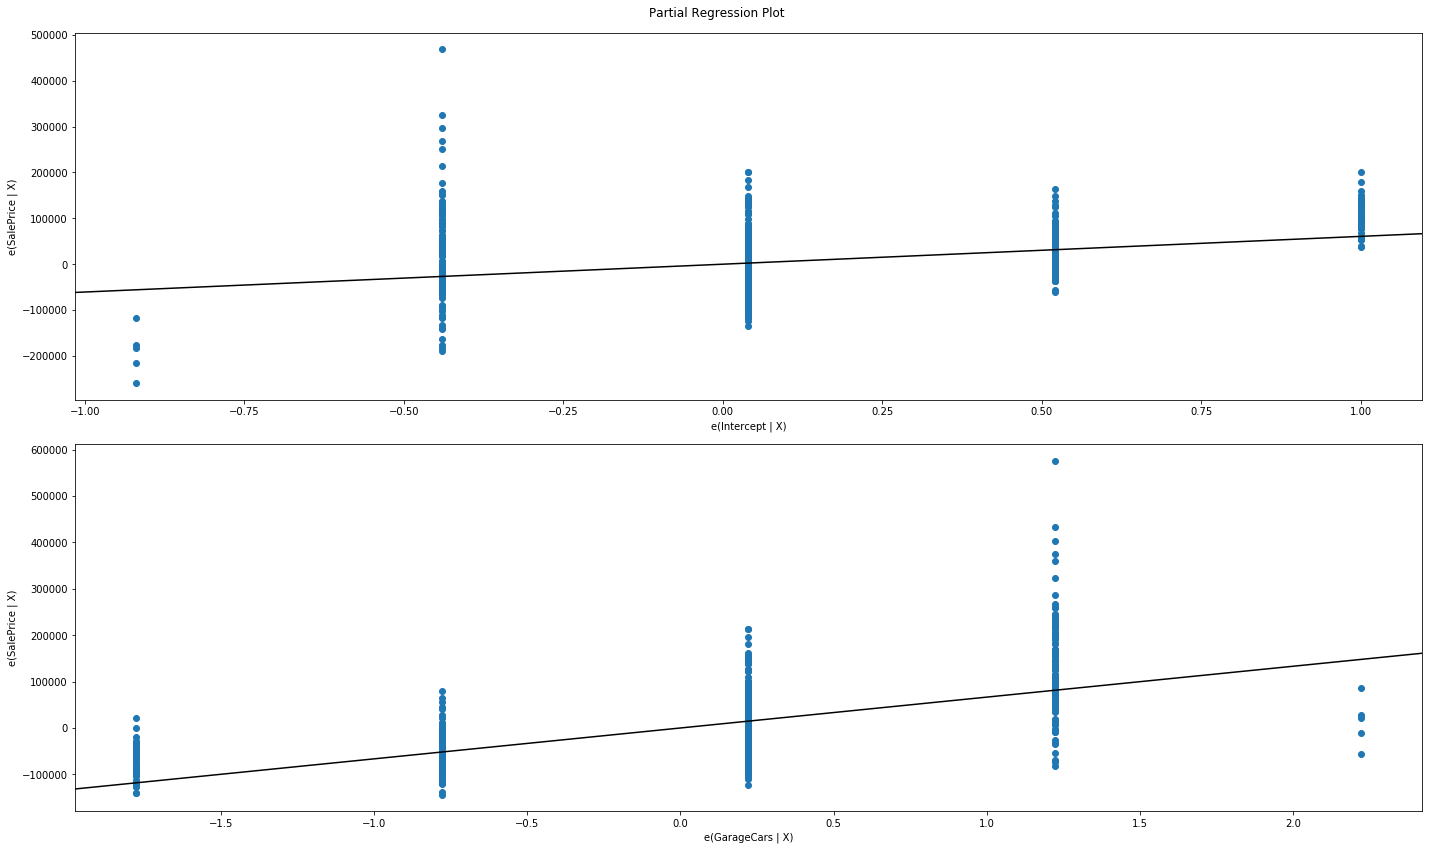

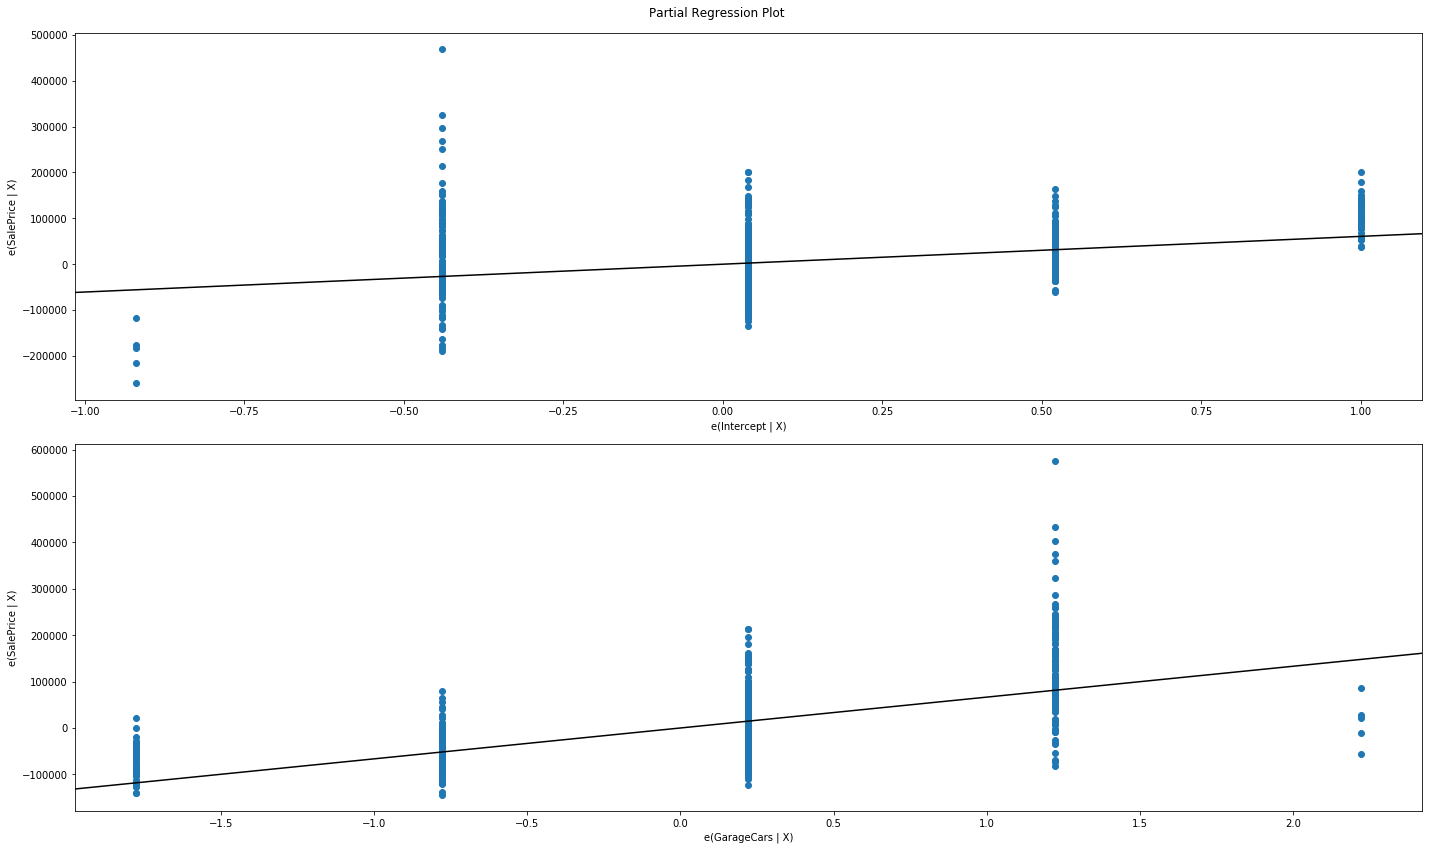

In [16]:
reglinear = ols("""SalePrice ~ GarageCars """, data=train).fit()
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(reglinear, fig=fig)
fig

In [17]:
olsmod = sm.OLS(y,X1)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     769.3
Date:                Thu, 14 Jun 2018   Prob (F-statistic):          1.26e-128
Time:                        19:30:42   Log-Likelihood:                -13573.
No. Observations:                1095   AIC:                         2.715e+04
Df Residuals:                    1093   BIC:                         2.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.068e+04   4617.007     13.143      0.0

Com base na tabela de resultados da regressão múltipla e nos gráficos plotados, na parte de treinamento logo acima, é possível realizar a seguinte análise:

"Adj. R-squared", o R2, indica que, aproximadamente, 41.3% da SalePrice pode ser explicada pela variável GarageCars.

O "coef" representa a mudança na variável dependente resultante de uma mudança de uma unidade nas demais variáveis. Em nosso modelo, um aumento de uma unidade da variável:

"GarageCars" aumenta em média o "SalePrice" em 6.068e+04.

Nos gráficos plotados é possível observar a direção de impacto (positivo ou negativo) das variáveis adotadas no SalePrice, conforme os coeficientes encontrados na regressão.

O "err" (erro padrão) mede a precisão da estimativa do coeficiente. Como o erro padrão da nossa variável é baixo é possível constatar, portanto, que ela é boa proxy para a explicação do SalePrice.

Um "P>|t|" (valor p) baixo indica que os resultados são estatisticamente significativos, isto é, em geral, o valor p é menor que 0,05. Portanto, com 95 % de confiança, podemos inferir que a variável adotada é significante para explicar o SalePrice.

O intervalo de confiança é um intervalo dentro do qual o nosso coeficiente provavelmente cairá. Podemos estar 41,3% confiantes de que :

O coeficiente de GarageCars estará dentro do nosso intervalo de confiança, (5.16e+04, 6.97e+04).

___
## Q2)  BOOTSTRAP 

#### Assuma que haja a seguinte conjectura: “Preço MEDIANO de venda da propriedade (em dólares) é de `160000`”.

Utilizando intervalo de confiança Bootstrap, analise se há evidências de que a afirmação seja verdadeira, considerando coeficiente de confiança de 95%.

Se baseie no algoritmo descrito na aula `Aula23 - Boostrapping com ilustração.ipynb`

**Algoritmo** (3,50 pontos)
 
   1. Repetir 10.000 vezes:
           1.1. Realizar um sorteio com reposição da amostra mestre. Usar a função random.choice() do numpy.
           1.2. Calcular a medida de interesse da reamostragem e guardar em uma lista.
   2. Plotar o histograma dessa lista de medidas de calculadas anteriormente.
   3. A partir da lista, encontrar os percentis de ordem $\alpha/2$ e $(1-\alpha)/2$ para construir Intervalo de Confiança Boostrap, sendo $\alpha=1-\gamma$.
   4. Se objetivo for tomada de decisão, avalie se o valor sob alguma hipótese faz parte ou não do intervalo de confiança construído e conclua!

___
    


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import math

%matplotlib inline

In [21]:
dados_preco=dados.loc[:,"SalePrice"]
dados_preco.dropna().head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [23]:
dados_preco=pd.Series(dados_preco)

In [25]:
n = len(dados_preco)

In [26]:
#Estimativas
xbarra = np.median(dados_preco)
dp = np.std(dados_preco,ddof=1)

print("Mediana: ", xbarra)
print("Desvio padrão amostral: ", dp)


Mediana:  163000.0
Desvio padrão amostral:  79442.5028829


In [32]:
#Construção das Reamostragens da amostra mestre (dados) com reposição
n = 10
xbarra_Boot = []

B = 10000
for i in range(B):
    # Gera uma reamostra dos dados_preco _com_ reposição
    x_barra = np.median(np.random.choice(dados_preco,size=n,replace=True))
    xbarra_Boot.append(x_barra)

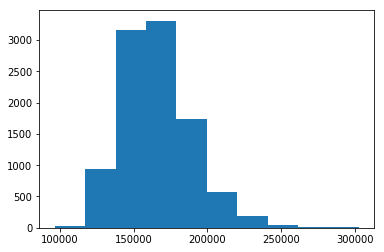

In [33]:
# Distribuição Bootstrap 
plot = plt.hist(xbarra_Boot)
plt.show()

In [35]:
# Intervalo de confiança Bootstrap Percentil (ou Quantil)
# Confiança = 0.95 ou seja Alpha = 0.05

Xc1 = np.percentile(xbarra_Boot, 2.5)
Xc2 = np.percentile(xbarra_Boot, 97.5)
print ('Intervalo de confiança:')
print('de',Xc1,'à', Xc2)

Intervalo de confiança:
de 128000.0 à 219750.0


# Tomada de decisão
Há evidências de que podemos confiar na afirmação da empresa.